# Proposed data-vector for clusters 

Here I present the porposal for the clusters cosmology data-vector format, using as example the DES Y1 data. The new format should be in h5 file type. The combined datasets are: 

* The weak lensing profiles: $\Delta\Sigma$ [$M_{\odot}/pc^2$] or $\gamma_t$
* In radial or angular bins: $R_{phys}$ [Mpc] or $\theta$ [arcmin]
* The weak lensing covariance
* The number counts: $N_c$
* The number counts covariance 

All these quantities for the following redshift and richness bins:

* $z_0 \in [0.2-0.35)$; 
* $z_1 \in [0.35-0.5)$;
* $z_2 \in [0.5-0.65)$;

* $\lambda \in [20, 30, 45, 60, \infty]$

In [1]:

import numpy as np
import h5py as h5
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from matplotlib.ticker import ScalarFormatter, FixedFormatter


/Users/maria/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fileName = "y1clusters_datavector.h5"
f = h5.File(fileName,  "r")

In [3]:
for item in f.attrs.items():
    print(item)

(u'file_name', 'y1clusters_datavector.h5')
(u'file_time', '17/03/2021 18:24:35')
(u'creator', u'dasilvap@umich.edu')
(u'HDF5_Version', u'1.10.1')
(u'h5py_version', u'2.7.0')


In [4]:
print(f.keys())

[u'y1']


In [5]:
print(f['y1'].keys())

[u'dvector']


In [6]:
print(f['y1/dvector'].keys())

[u'covmat_nc', u'covmat_wl', u'deltasig', u'ncounts', u'radius']


In [7]:
for item in f['y1/dvector'].keys():
    print(item+':', f['y1/dvector/'+item].attrs.items())

(u'covmat_nc:', [(u'NC units', u'counts')])
(u'covmat_wl:', [(u'COV_WL units', u'Msun/pc^2')])
(u'deltasig:', [(u'DS units', u'Msun/pc^2')])
(u'ncounts:', [(u'COV_NC units', u'counts')])
(u'radius:', [(u'R units', u'Mpc [physical]')])


In [8]:
for item in f['y1/dvector'].keys():
    print(item+':', f['y1/dvector/'+item].shape)

(u'covmat_nc:', (24, 24))
(u'covmat_wl:', (180, 180))
(u'deltasig:', (180,))
(u'ncounts:', (3, 4))
(u'radius:', (180,))


In [9]:
deltasig = pd.DataFrame(np.array(f['y1/dvector/deltasig']))
radius = pd.DataFrame(np.array(f['y1/dvector/radius']))
covmat_wl = pd.DataFrame(np.array(f['y1/dvector/covmat_wl']))

ncounts = pd.DataFrame(np.array(f['y1/dvector/ncounts']))
covmat_nc = pd.DataFrame(np.array(f['y1/dvector/covmat_nc']))

f.close()

In [10]:
deltasig

,0
0,12.814025
1,60.151447
2,112.055433
3,113.477021
4,78.158072
5,63.729482
6,49.603377
7,35.777964
8,20.586636
9,8.131993


In [11]:
radius

,0
0,0.042211
1,0.066515
2,0.105164
3,0.165376
4,0.260698
5,0.412030
6,0.650455
7,1.025638
8,1.618573
9,2.553791


In [12]:
covmat_wl

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,5835.309737,36.801056,38.812098,31.481800,18.020022,9.996896,6.242657,2.660026,0.889304,0.393088,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,36.801056,1632.275653,27.813408,23.735955,16.202546,9.231551,4.943693,1.970584,0.764537,0.378362,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,38.812098,27.813408,697.026505,22.499889,14.220841,8.291367,4.637653,2.194163,1.203223,0.436678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,31.481800,23.735955,22.499889,305.930940,12.066933,7.478491,4.052528,1.946362,0.920686,0.379573,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,18.020022,16.202546,14.220841,12.066933,125.588219,5.586797,2.746908,1.564025,0.702739,0.361729,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,9.996896,9.231551,8.291367,7.478491,5.586797,55.136095,1.965014,0.967509,0.529506,0.211927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6.242657,4.943693,4.637653,4.052528,2.746908,1.965014,22.367899,0.782730,0.278957,0.112518,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2.660026,1.970584,2.194163,1.946362,1.564025,0.967509,0.782730,9.492743,0.215811,0.079944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.889304,0.764537,1.203223,0.920686,0.702739,0.529506,0.278957,0.215811,3.861558,0.097726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.393088,0.378362,0.436678,0.379573,0.361729,0.211927,0.112518,0.079944,0.097726,1.608669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
ncounts

,0,1,2,3
0,762.0,376.0,123.0,91.0
1,1549.0,672.0,187.0,148.0
2,1612.0,687.0,205.0,92.0


In [14]:
covmat_nc

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3396.845900,1384.358000,519.226740,488.232730,-96.661625,-52.498207,-18.777124,-16.048353,-49.005033,-25.596270,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1384.358000,1162.086100,285.613990,268.584770,-53.179942,-28.882730,-10.330536,-8.829258,-26.960904,-14.082198,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,519.226740,285.613990,232.567140,100.826550,-19.973633,-10.847945,-3.880003,-3.316145,-10.126134,-5.289074,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,488.232730,268.584770,100.826550,186.893410,-18.848304,-10.236763,-3.661401,-3.129310,-9.555620,-4.991084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-96.661625,-53.179942,-19.973633,-18.848304,5140.863200,1973.444100,698.571760,597.266390,-188.995390,-98.715924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-52.498207,-28.882730,-10.847945,-10.236763,1973.444100,1728.499900,376.895800,322.266060,-102.645900,-53.613924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-18.777124,-10.330536,-3.880003,-3.661401,698.571760,376.895800,331.953980,114.508840,-36.713534,-19.176184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,-16.048353,-8.829258,-3.316145,-3.129310,597.266390,322.266060,114.508840,230.575430,-31.378169,-16.389420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-49.005033,-26.960904,-10.126134,-9.555620,-188.995390,-102.645900,-36.713534,-31.378169,4788.819500,1606.499600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,-25.596270,-14.082198,-5.289074,-4.991084,-98.715924,-53.613924,-19.176184,-16.389420,1606.499600,1562.534900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# Getting DeltaSigmas and errors for plotting

deltasig_split = np.array_split(deltasig, 12)
radius_split = np.array_split(radius, 12)

diag_covmat_wl = np.diag(covmat_wl)
diag_covmat_wl_split = np.array_split(diag_covmat_wl, 12) 

print np.shape(diag_covmat_wl_split[11]), np.shape(np.array(deltasig_split[11]).flatten())

(15,) (15,)


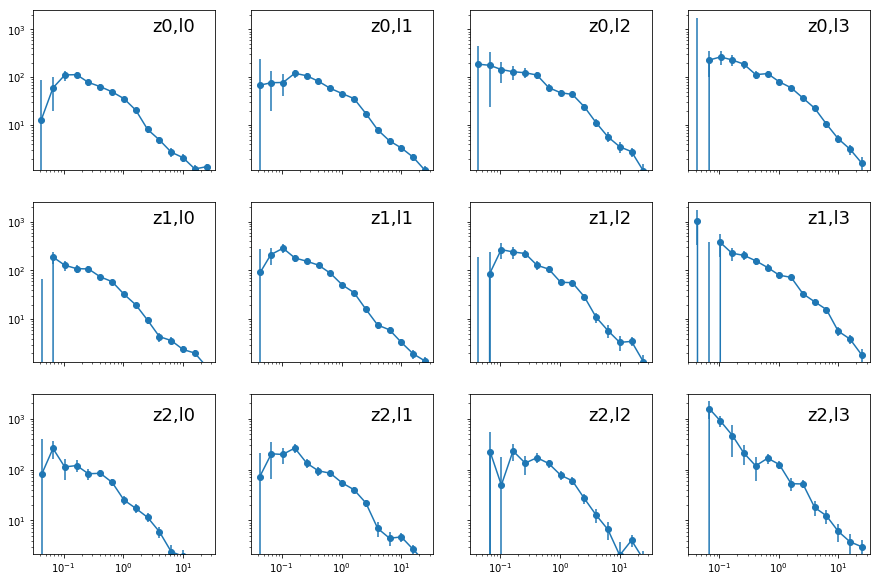

In [16]:
#Plot DeltaSigmas    

fig, ax = plt.subplots(3, 4, sharex='col', sharey='row', figsize=(15,10))
for i in range(3):
    for j in range(4):
        ax[i, j].text(3, 900, ('z'+str(i)+','+'l'+str(j)), fontsize=18) #ha='center'
        ax[i, j].errorbar(np.array(radius_split[i+j*3]).flatten(), np.array(deltasig_split[i+j*3]).flatten(), yerr=np.sqrt(diag_covmat_wl_split[i+j*3]), fmt='-o')
        ax[i, j].set_xscale('log')
        ax[i, j].set_yscale('log')
#fig
plt.show()

In [17]:
#Get diagonal terms of NC covmat

nctr = np.diag(covmat_nc)
nctr

array([3.3968459e+03, 1.1620861e+03, 2.3256714e+02, 1.8689341e+02,
       5.1408632e+03, 1.7284999e+03, 3.3195398e+02, 2.3057543e+02,
       4.7888195e+03, 1.5625349e+03, 3.0430204e+02, 1.8191316e+02,
       2.9925937e-03, 3.5139162e-03, 4.4053370e-03, 4.1387787e-03,
       4.1780629e-03, 4.6959840e-03, 6.1847283e-03, 4.0750845e-03,
       7.4605384e-03, 9.0798479e-03, 7.6799696e-03, 8.4285386e-03])

In [18]:
#Getting the NC errors for plotting 

ncounts_err = np.sqrt(nctr[:12]) #nctr[:12] is the covmat terms that matter
ncounts_err = np.array(ncounts_err.reshape(3,4) )

In [19]:
#Array of lambdas for plotting
x = np.array([20,30,45,60,200])
midpoints = x[:-1] + np.diff(x)/2.
repetitions = 3
lambdas = np.tile(midpoints, (repetitions, 1))
lambdas

array([[ 25. ,  37.5,  52.5, 130. ],
       [ 25. ,  37.5,  52.5, 130. ],
       [ 25. ,  37.5,  52.5, 130. ]])

In [20]:
#Checking the sizes
ncounts = np.array(ncounts)
np.shape(ncounts), np.shape(ncounts_err), np.shape(lambdas)

((3, 4), (3, 4), (3, 4))

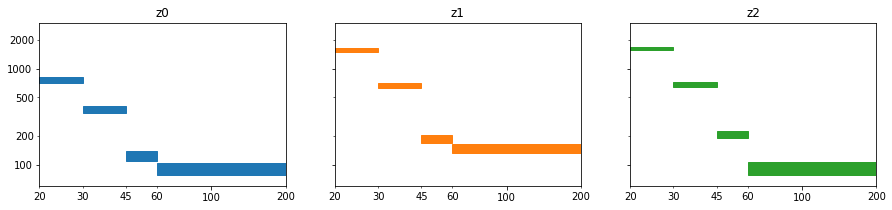

In [21]:
#Plotting number counts

cor = ['C0', 'C1', 'C2']
xticks = [20, 30, 45, 60, 200]
xticklabels = ['20', '30', '45', '60', '200']
yticks = [200, 500, 2000]
yticklabels = ['200', '500','2000']



fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(15,3))

for i in range(len(cor)):
    #plt.errorbar(lambdas[i], ncounts[i],yerr=ncounts_err[i], color=cor[i], fmt='o')
    rectangles = {'l0': mpatch.Rectangle((20,ncounts[i][0]-ncounts_err[i][0]), 10, 2*ncounts_err[i][0], color=cor[i]),
                  'l1': mpatch.Rectangle((30,ncounts[i][1]-ncounts_err[i][1]), 15, 2*ncounts_err[i][1], color=cor[i]),
                  'l2': mpatch.Rectangle((45,ncounts[i][2]-ncounts_err[i][2]), 15, 2*ncounts_err[i][2], color=cor[i]),
                  'l3': mpatch.Rectangle((60,ncounts[i][3]-ncounts_err[i][3]), 140, 2*ncounts_err[i][3], color=cor[i])}

    for r in rectangles:
        ax[i].add_artist(rectangles[r])
    ax[i].set_xlim((20, 200))
    ax[i].set_ylim((60, 3000))  
    ax[i].set_xscale('log')    
    ax[i].set_yscale('log')   
    #customize x-axis
    ax[i].set_xticks(xticks, xticklabels)
    ax[i].xaxis.set_major_formatter(ScalarFormatter())
    ax[i].xaxis.set_minor_formatter(FixedFormatter(xticks))
    #customize y-axis
    ax[i].set_yticks(yticks, yticklabels)
    ax[i].yaxis.set_major_formatter(ScalarFormatter())
    ax[i].yaxis.set_minor_formatter(FixedFormatter(yticks))
    ax[i].set_title('z'+str(i))
    
'''    
for i in range(len(cor)):
    plt.errorbar(lambdas[i], ncounts[i],yerr=ncounts_err[i], color=cor[i], fmt='o')
xticks = [20, 30, 45, 60, 200]
ticklabels = ['20', '30', '45', '60', '200']
plt.xticks(xticks, ticklabels)
plt.xscale('log')    
plt.yscale('log')   
plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
'''

#fig
plt.show()   

In [22]:
#Correlation from WL covariances

D = np.diag(np.sqrt(np.diagonal(covmat_wl)))
Dinv = np.linalg.inv(D)
corr_wl =  np.dot(Dinv, np.dot(covmat_wl, Dinv))


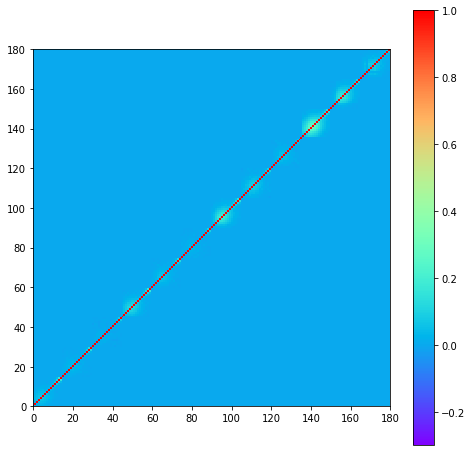

In [23]:
#Plot WL correlation matrix


plt.figure(figsize=(8,8))
plt.imshow(corr_wl, vmin=-0.3, vmax=1,cmap='rainbow')
plt.xlim(0,180)
plt.ylim(0,180) #change the diagonal direction in the plot
plt.colorbar()
plt.show()
plt.close()

In [24]:
#Correlation from NC covariances

d = np.diag(np.sqrt(np.diagonal(covmat_nc)))
dinv = np.linalg.inv(d)
corr_nc =  np.dot(dinv, np.dot(covmat_nc, dinv))


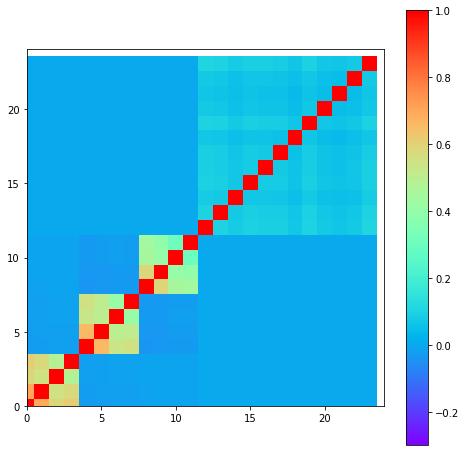

In [25]:
#Plot NC correlations

plt.figure(figsize=(8,8))
plt.imshow(corr_nc, vmin=-0.3, vmax=1,cmap='rainbow')
plt.xlim(0,24)
plt.ylim(0,24) 
plt.colorbar()
plt.show()
plt.close()